In [1]:
# !pip install numpy pandas matplotlib seaborn sklearn eli5 shap pdpbox 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [3]:
dt = pd.read_csv('heart.csv')
dt.head(10)

age  sex  chest_pain_type  resting_bps  cholestrol  fasting_blood_sugar  \
0   63    1                3          145         233                    1   
1   37    1                2          130         250                    0   
2   41    0                1          130         204                    0   
3   56    1                1          120         236                    0   
4   57    0                0          120         354                    0   
5   57    1                0          140         192                    0   
6   56    0                1          140         294                    0   
7   44    1                1          120         263                    0   
8   52    1                2          172         199                    1   
9   57    1                2          150         168                    0   

   resting_ecg  max_heartrate  exercise_induced_angina  oldpeak  slope  \
0            0            150                        0      2.3      0   
1            1            187                        0      3.5      0   
2            0            172                        0      1.4      2   
3            1            178                        0      0.8      2   
4            1            163                        1      0.6      2   
5            1            148                        0      0.4      1   
6            0            153                        0      1.3      1   
7            1            173                        0      0.0      2   
8            1            162                        0      0.5      2   
9            1            174                        0      1.6      2   

   major_vessels  defects  target  
0              0        1       1  
1              0        2       1  
2              0        2       1  
3              0        2       1  
4              0        2       1  
5              0        1       1  
6              0        2       1  
7              0        3       1  
8              0        3       1  
9              0        2       1

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_bps              303 non-null    int64  
 4   cholestrol               303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   resting_ecg              303 non-null    int64  
 7   max_heartrate            303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   oldpeak                  303 non-null    float64
 10  slope                    303 non-null    int64  
 11  major_vessels            303 non-null    int64  
 12  defects                  303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [8]:
dt.head(10)

age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    male  non-anginal pain                     145          233   
1   37    male   atypical angina                     130          250   
2   41  female    typical angina                     130          204   
3   56    male    typical angina                     120          236   
4   57  female                 0                     120          354   
5   57    male                 0                     140          192   
6   56  female    typical angina                     140          294   
7   44    male    typical angina                     120          263   
8   52    male   atypical angina                     172          199   
9   57    male   atypical angina                     150          168   

     fasting_blood_sugar               rest_ecg  max_heart_rate_achieved  \
0  greater than 120mg/ml                 normal                      150   
1    lower than 120mg/ml  ST-T wave abnormality                      187   
2    lower than 120mg/ml                 normal                      172   
3    lower than 120mg/ml  ST-T wave abnormality                      178   
4    lower than 120mg/ml  ST-T wave abnormality                      163   
5    lower than 120mg/ml  ST-T wave abnormality                      148   
6    lower than 120mg/ml                 normal                      153   
7    lower than 120mg/ml  ST-T wave abnormality                      173   
8  greater than 120mg/ml  ST-T wave abnormality                      162   
9    lower than 120mg/ml  ST-T wave abnormality                      174   

  exercise_induced_angina  st_depression   st_slope  num_major_vessels  \
0                      no            2.3          0                  0   
1                      no            3.5          0                  0   
2                      no            1.4       flat                  0   
3                      no            0.8       flat                  0   
4                     yes            0.6       flat                  0   
5                      no            0.4  upsloping                  0   
6                      no            1.3  upsloping                  0   
7                      no            0.0       flat                  0   
8                      no            0.5       flat                  0   
9                      no            1.6       flat                  0   

         thalassemia  target  
0             normal       1  
1       fixed defect       1  
2       fixed defect       1  
3       fixed defect       1  
4       fixed defect       1  
5             normal       1  
6       fixed defect       1  
7  reversable defect       1  
8  reversable defect       1  
9       fixed defect       1

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

In [10]:
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

In [12]:
dt = pd.get_dummies(dt, drop_first=True)

In [13]:
dt.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  target  sex_male  \
0            2.3                  0       1         1   
1            3.5                  0       1         1   
2            1.4                  0       1         0   
3            0.8                  0       1         1   
4            0.6                  0       1         0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 1   
1                                1                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                               0                                        0   
1                               0                                        1   
2                               1                                        1   
3                               1                                        1   
4                               0                                        1   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                      0                1   
1                                      0                0   
2                                      0                1   
3                                      0                0   
4                                      0                0   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                            0              0                   0   
1                            0              0                   0   
2                            0              1                   0   
3                            0              1                   0   
4                            1              1                   0   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                         0                   1                              0  
1                         1                   0                              0  
2                         1                   0                              0  
3                         1                   0                              0  
4                         1                   0                              0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10) #split the data

In [15]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [17]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

In [18]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [19]:
from IPython.display import Image
Image(filename = 'tree.png')

In [20]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[28,  7],
       [ 3, 23]])

In [22]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9032258064516129
Specificity :  0.7666666666666667


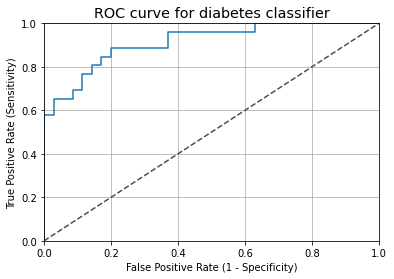

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [24]:
auc(fpr, tpr)

0.9131868131868132

In [25]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

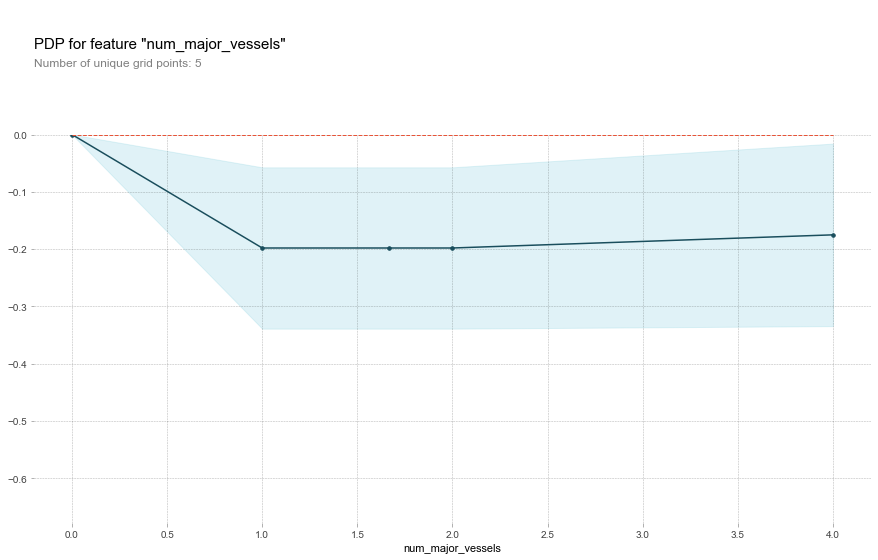

In [26]:
base_features = dt.columns.values.tolist()
base_features.remove('target')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

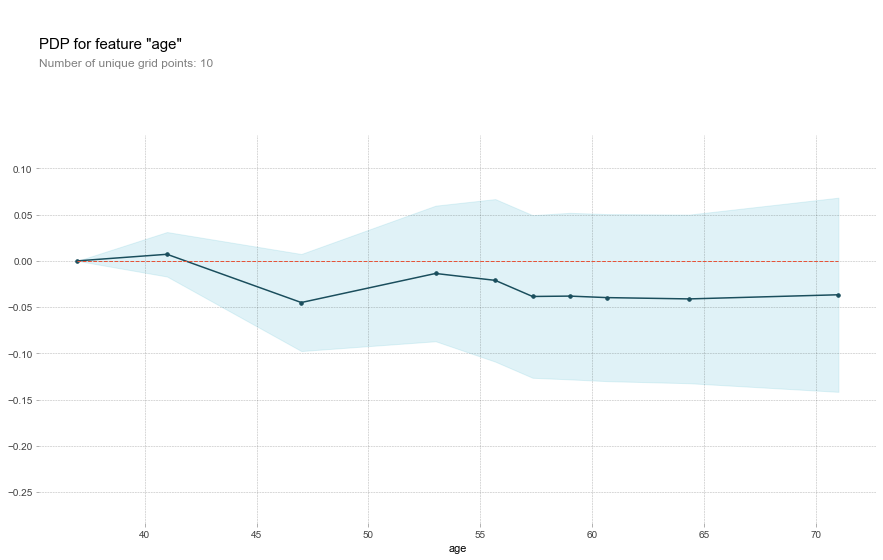

In [27]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

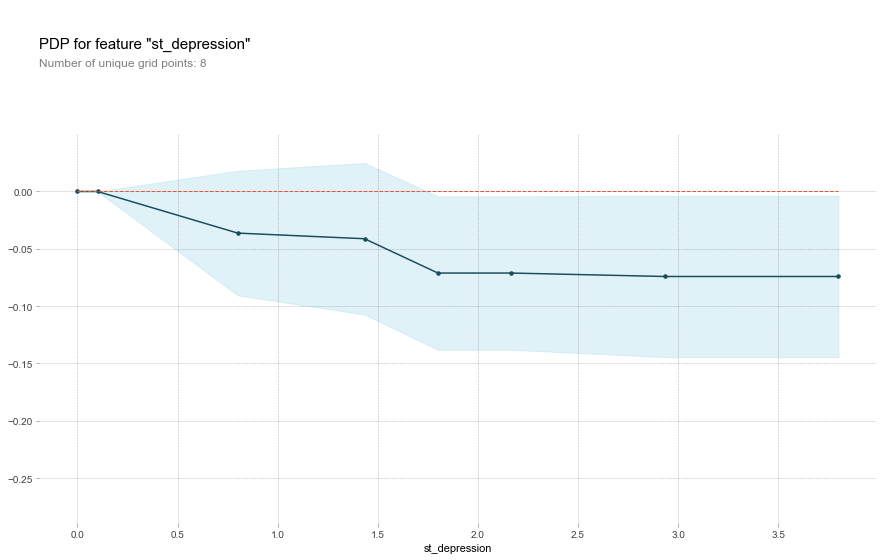

In [28]:
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

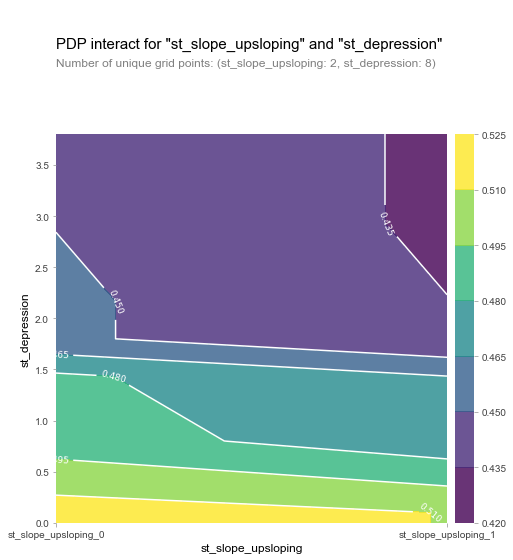

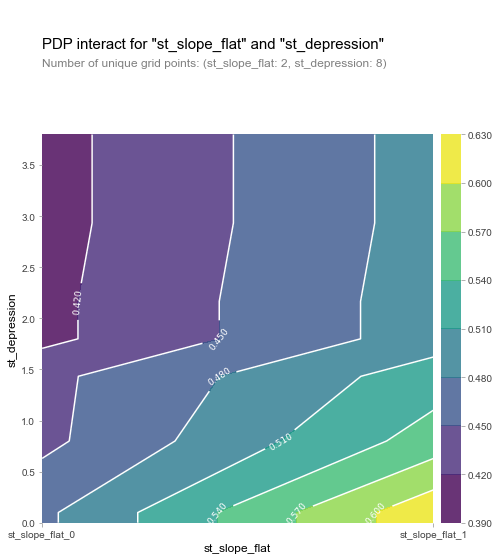

In [29]:
inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['st_slope_upsloping', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['st_slope_upsloping', 'st_depression'], plot_type='contour')
plt.show()

inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['st_slope_flat', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['st_slope_flat', 'st_depression'], plot_type='contour')
plt.show()


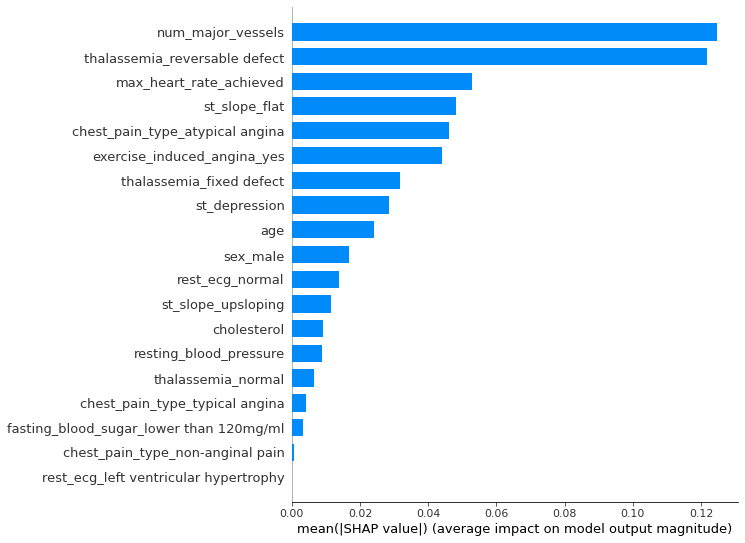

In [30]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

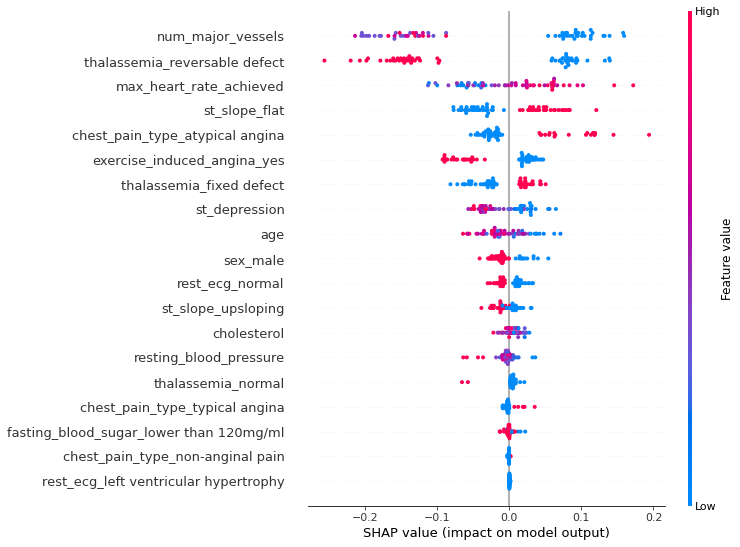

In [31]:
shap.summary_plot(shap_values[1], X_test)

In [32]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [33]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# data_for_prediction = X_test.iloc[1,:].astype(float)
# heart_disease_risk_factors(model, data_for_prediction)

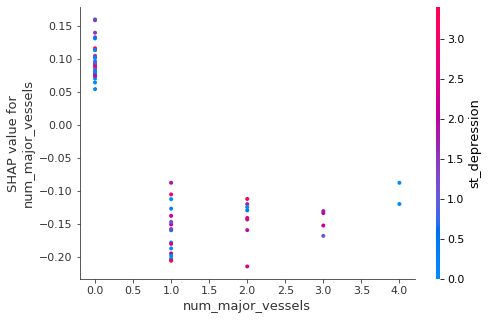

In [34]:
ax2 = fig.add_subplot(224)
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index="st_depression")

In [35]:
shap.initjs()
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

In [36]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [37]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8360655737704918


In [38]:
print (model.estimators_[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=914636141, splitter='best')


In [39]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pickle
pipeline_org = Pipeline( steps = [ ( "classifier", DecisionTreeClassifier()) ] )
pipeline_org.fit( X_train, y_train )
pickle.dump( pipeline_org, open( "heartattack.pkl", 'wb') )
!mkdir model-dir
!cp heartattack.pkl model-dir
!tar -zcvf heartattack.tar.gz heartattack.pkl

mkdir: model-dir: File exists
a heartattack.pkl
